# **Word Frequency Analysis**

In [26]:
documents = ['The digital transformation of businesses across various sectors has been accelerated by advancements in technology. Artificial intelligence (AI), machine learning (ML), and data analytics are driving innovation in industries such as healthcare, education, retail, and transportation. AI is enabling automation, improving decision-making, and enhancing customer experiences. In healthcare, AI is being used for predictive diagnostics, personalized treatment plans, and drug discovery. By analyzing vast datasets of medical records, AI models can detect patterns that help doctors make more accurate predictions and improve patient outcomes. Machine learning algorithms are being employed to identify fraudulent transactions, optimize supply chains, and enhance cybersecurity. In education, AI-powered tools are personalizing learning experiences, helping students learn at their own pace while providing teachers with valuable insights into student progress. Retailers are using AI to predict consumer behavior, optimize inventory management, and personalize marketing campaigns. The growth of e-commerce platforms has further increased the demand for AI technologies that enhance customer experience, improve recommendations, and streamline logistics. Autonomous vehicles, powered by AI and machine learning, are set to revolutionize the transportation industry. Self-driving cars and drones promise to reduce traffic congestion, increase road safety, and reduce transportation costs. However, the widespread adoption of autonomous vehicles raises important ethical and regulatory questions, such as safety standards, data privacy, and the impact on employment in the transportation sector. In finance, AI is transforming the way banks operate, helping with fraud detection, risk assessment, and trading automation. AI-powered robo-advisors are now providing personalized investment strategies for individuals, while machine learning models predict market trends with increasing accuracy. Despite the many advantages AI offers, there are significant challenges that must be addressed, including concerns over job displacement, bias in AI models, and the ethical implications of AI decision-making. The debate over AI’s potential to disrupt the workforce has sparked discussions on the need for reskilling and upskilling to prepare workers for the new opportunities created by technology. Additionally, the use of AI in sensitive areas such as criminal justice and hiring decisions has raised concerns about the fairness of algorithms and the need for greater transparency in AI systems. As AI continues to advance, there is a growing need for responsible development and regulation to ensure that these technologies are deployed in ways that benefit society as a whole. The integration of AI into society presents an opportunity to enhance productivity, foster innovation, and improve the quality of life for people worldwide. However, it also requires careful consideration of the ethical, social, and economic implications of these transformative technologies. The future of AI is bright, and as more industries embrace it, we will likely see a continued evolution in how we live, work, and interact with the world around us.'
,"The breathtaking view from the top of the mountain, with its sprawling valleys, shimmering rivers, and lush green forests stretching as far as the eye could see, made the arduous climb worthwhile, leaving every hiker in awe of nature's splendor and beauty.","The breathtaking view from the top of the mountain, with its sprawling valleys, shimmering rivers, and lush green forests stretching as far as the eye could see, made the arduous climb worthwhile, leaving every hiker in awe of nature's splendor and beauty.",
    "Despite facing numerous obstacles, including financial challenges, limited resources, and a lack of initial support, the young entrepreneur remained determined to turn her innovative ideas into a thriving business.",
    "The conference hall, filled with experts from various industries, echoed with lively discussions about the future of technology, as participants exchanged groundbreaking ideas and explored collaborative opportunities.",
    "In the heart of the bustling city, where skyscrapers towered over narrow streets and the hum of activity never ceased, a small, quaint café provided a tranquil escape for those seeking a moment of peace.",
    "The novel, with its intricate plot, well-developed characters, and unexpected twists, kept readers engrossed from start to finish, earning praise from critics and fans alike."
]

## **Text Preprocessing**

In [30]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Preprocess documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]
print(preprocessed_documents)


[['digital', 'transformation', 'businesses', 'across', 'various', 'sectors', 'accelerated', 'advancements', 'technology', 'artificial', 'intelligence', 'ai', 'machine', 'learning', 'ml', 'data', 'analytics', 'driving', 'innovation', 'industries', 'healthcare', 'education', 'retail', 'transportation', 'ai', 'enabling', 'automation', 'improving', 'decisionmaking', 'enhancing', 'customer', 'experiences', 'healthcare', 'ai', 'used', 'predictive', 'diagnostics', 'personalized', 'treatment', 'plans', 'drug', 'discovery', 'analyzing', 'vast', 'datasets', 'medical', 'records', 'ai', 'models', 'detect', 'patterns', 'help', 'doctors', 'make', 'accurate', 'predictions', 'improve', 'patient', 'outcomes', 'machine', 'learning', 'algorithms', 'employed', 'identify', 'fraudulent', 'transactions', 'optimize', 'supply', 'chains', 'enhance', 'cybersecurity', 'education', 'aipowered', 'tools', 'personalizing', 'learning', 'experiences', 'helping', 'students', 'learn', 'pace', 'providing', 'teachers', 'va

## **Bag-of-Words**

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

joined_documents = [' '.join(doc) for doc in preprocessed_documents]
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(joined_documents)
import pandas as pd
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df)

   accelerated  accuracy  accurate  across  ...  world  worldwide  worthwhile  young
0            1         1         1       1  ...      1          1           0      0
1            0         0         0       0  ...      0          0           1      0
2            0         0         0       0  ...      0          0           1      0
3            0         0         0       0  ...      0          0           0      1
4            0         0         0       0  ...      0          0           0      0
5            0         0         0       0  ...      0          0           0      0
6            0         0         0       0  ...      0          0           0      0

[7 rows x 321 columns]


##**TF-IDF**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(joined_documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),columns=vectorizer.get_feature_names_out())
print(tfidf_df)

   accelerated  accuracy  accurate    across  ...     world  worldwide  worthwhile     young
0     0.039048  0.039048  0.039048  0.039048  ...  0.039048   0.039048    0.000000  0.000000
1     0.000000  0.000000  0.000000  0.000000  ...  0.000000   0.000000    0.193417  0.000000
2     0.000000  0.000000  0.000000  0.000000  ...  0.000000   0.000000    0.193417  0.000000
3     0.000000  0.000000  0.000000  0.000000  ...  0.000000   0.000000    0.000000  0.224982
4     0.000000  0.000000  0.000000  0.000000  ...  0.000000   0.000000    0.000000  0.000000
5     0.000000  0.000000  0.000000  0.000000  ...  0.000000   0.000000    0.000000  0.000000
6     0.000000  0.000000  0.000000  0.000000  ...  0.000000   0.000000    0.000000  0.000000

[7 rows x 321 columns]


##**Word Cloud Visualization**

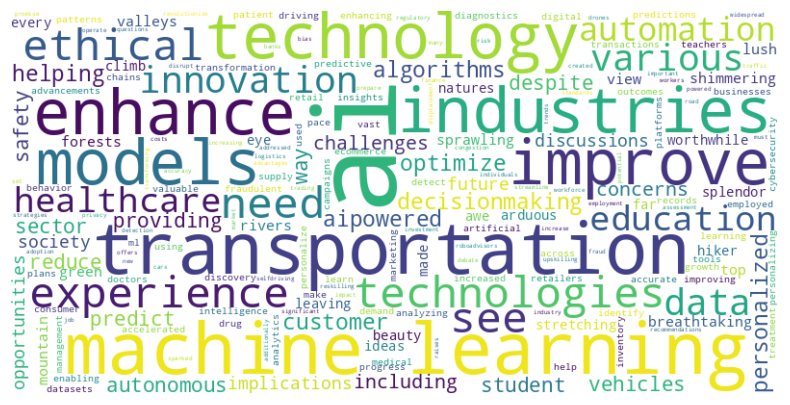

In [34]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into one string
all_text = " ".join([" ".join(doc) for doc in preprocessed_documents])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##**Analyzing Most Common Words**

In [36]:
from collections import Counter

# Flatten the list of preprocessed words
all_words = [word for doc in preprocessed_documents for word in doc]

# Count word frequencies
word_counts = Counter(all_words)

# Get the top 10 most common words
most_common_words = word_counts.most_common(10)
df = pd.DataFrame(most_common_words, columns=["Word", "Frequency"])
print(df)


             Word  Frequency
0              ai         16
1        learning          5
2         machine          4
3  transportation          4
4      technology          3
5      industries          3
6          models          3
7         improve          3
8         enhance          3
9    technologies          3


##**Data Visualization**

<ipython-input-43-bb28307655a1>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("viridis")  # You can replace "viridis" with other colormaps like "plasma", "cool", "autumn", etc.


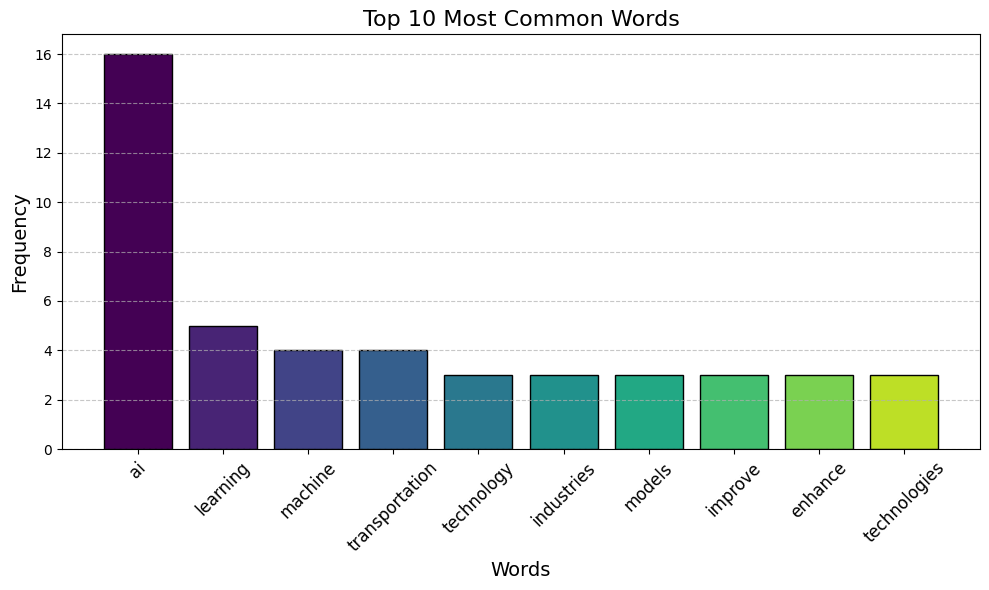

In [43]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd


# Use a colormap
cmap = get_cmap("viridis")  # You can replace "viridis" with other colormaps like "plasma", "cool", "autumn", etc.
colors = [cmap(i / len(df)) for i in range(len(df))]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df["Word"], df["Frequency"], color=colors, edgecolor="black")

# Add labels and title
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Top 10 Most Common Words", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
